In [2]:
# Imports + Load data

import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\User\OneDrive\Documents\OR PROJECTS\data\raw\ab_test_data.csv")
df.head()

,user_id,group,converted,revenue
0,0,control,0,20.173309
1,1,control,1,1.870179
2,2,control,0,49.231015
3,3,control,0,45.656389
4,4,control,0,48.486871


In [3]:
print("Shape:", df.shape)
print(df.dtypes)

# Check groups are balanced
display(df["group"].value_counts())

# Any missing values?
missing = df.isna().mean().sort_values(ascending=False)
display(missing[missing > 0].to_frame("missing_rate"))


Shape: (10000, 4)
user_id        int64
group         object
converted      int64
revenue      float64
dtype: object


group
control      5000
treatment    5000
Name: count, dtype: int64

,missing_rate


In [4]:
# Experiment definition + metrics snapshot

summary = df.groupby("group").agg(
    users=("user_id", "count"),
    conversions=("converted", "sum"),
    conversion_rate=("converted", "mean"),
    avg_revenue=("revenue", "mean"),
    median_revenue=("revenue", "median")
)
display(summary)


,users,conversions,conversion_rate,avg_revenue,median_revenue
group,,,,,
control,5000,479,0.0958,39.707571,33.081260
treatment,5000,636,0.1272,48.776505,41.316114


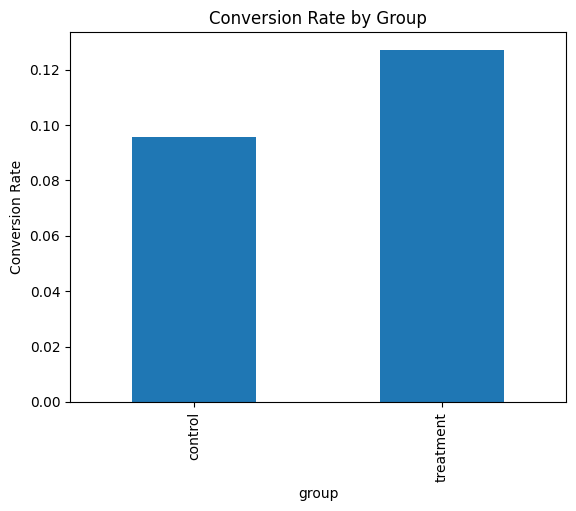

<Figure size 640x480 with 0 Axes>

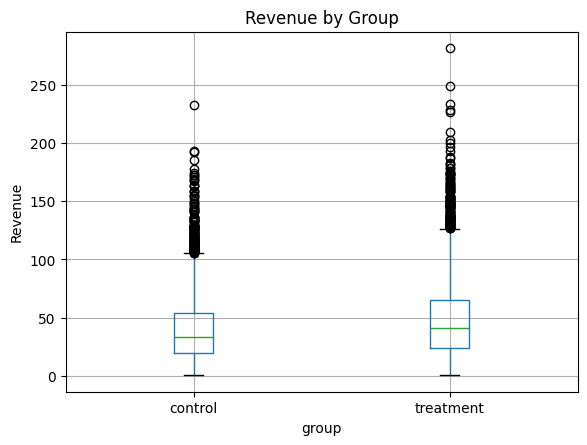

In [5]:
# Quick visualization (conversion + revenue)

import matplotlib.pyplot as plt

# Conversion rate
plt.figure()
summary["conversion_rate"].plot(kind="bar")
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()

# Revenue distribution (boxplot)
plt.figure()
df.boxplot(column="revenue", by="group")
plt.title("Revenue by Group")
plt.suptitle("")
plt.ylabel("Revenue")
plt.show()


Experiment Goal: Evaluate whether a new onboarding flow improves conversion and revenue.

Primary Metric: Conversion Rate (Converted / Users)
Secondary Metric: Revenue per User (RPU)

Hypotheses (Primary):

H0: Conversion(Treatment) = Conversion(Control)

H1: Conversion(Treatment) > Conversion(Control)

Key Assumptions:

Random assignment (no selection bias)

Stable behavior during experiment (no major seasonality shocks)

No interference (one user’s treatment doesn’t affect another user)